# Basic Output

When a cell is run, it can generate *output*. In IPython, the definition of output is quite general; it can be text, images, LaTeX, HTML or JSON. All output is displayed below the code that generated it, in the *output area*.

This Notebook describes the basics of output and shows how the `stdout/stderr` streams are handled.

##Displayhook

When a Python object is returned by an expression, Python's `displayhook` mechanism is triggered. In IPython, this results in an output prompt, such as `Out[2]`. These objects are then available under the variables:

* `_` (last output)
* `__` (second to last output)
* `_N` (`Out[N]`)

In [ ]:
import numpy as np
import sys

In [ ]:
np.random.rand(10)

In [ ]:
np.sin(_)

## sys.stdout and sys.stderr

The stdout and stderr streams are displayed as text in the output area.

In [1]:
print("hi, stdout")

hi, stdout


In [2]:
from __future__ import print_function
print('hi, stderr', file=sys.stderr)

NameError: name 'sys' is not defined

## Output is asynchronous

All output is displayed asynchronously as it is generated in the Kernel. If you execute the next cell, you will see the output one piece at a time, not all at the end.

In [4]:
import time, sys
for i in range(8):
    print(i)
    time.sleep(0.5)

0
1
2
3
4
5
6
7


## Large outputs

To better handle large outputs, the output area can be collapsed. Run the following cell and then single- or double- click on the active area to the left of the output:

In [6]:
for i in range(50):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


Beyond a certain point, output will scroll automatically:

In [7]:
for i in range(500):
    print(2**i - 1)

0
1
3
7
15
31
63
127
255
511
1023
2047
4095
8191
16383
32767
65535
131071
262143
524287
1048575
2097151
4194303
8388607
16777215
33554431
67108863
134217727
268435455
536870911
1073741823
2147483647
4294967295
8589934591
17179869183
34359738367
68719476735
137438953471
274877906943
549755813887
1099511627775
2199023255551
4398046511103
8796093022207
17592186044415
35184372088831
70368744177663
140737488355327
281474976710655
562949953421311
1125899906842623
2251799813685247
4503599627370495
9007199254740991
18014398509481983
36028797018963967
72057594037927935
144115188075855871
288230376151711743
576460752303423487
1152921504606846975
2305843009213693951
4611686018427387903
9223372036854775807
18446744073709551615
36893488147419103231
73786976294838206463
147573952589676412927
295147905179352825855
590295810358705651711
1180591620717411303423
2361183241434822606847
4722366482869645213695
9444732965739290427391
18889465931478580854783
37778931862957161709567
75557863725914323419135
151

## Capturing output with <tt>%%capture</tt>

IPython has a [cell magic](Cell%20Magics.ipynb), `%%capture`, which captures the stdout/stderr of a cell. With this magic you can discard these streams or store them in a variable.

In [8]:
from __future__ import print_function
import sys

By default, `%%capture` discards these streams.  This is a simple way to suppress unwanted output.

In [9]:
%%capture
print('hi, stdout')
print('hi, stderr', file=sys.stderr)

If you specify a name, then stdout/stderr will be stored in an object in your namespace.

In [10]:
%%capture captured
print('hi, stdout')
print('hi, stderr', file=sys.stderr)

In [11]:
captured

Calling the object writes the output to stdout/stderr as appropriate.

In [12]:
captured()

hi, stdout


hi, stderr


In [13]:
captured.stdout

'hi, stdout\n'

In [14]:
captured.stderr

'hi, stderr\n'

`%%capture` grabs all output types, not just stdout/stderr, so you can do plots and use IPython's display system inside `%%capture`

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [16]:
%%capture wontshutup

print("setting up X")
x = np.linspace(0,5,1000)
print("step 2: constructing y-data")
y = np.sin(x)
print("step 3: display info about y")
plt.plot(x,y)
print("okay, I'm done now")

setting up X
step 2: constructing y-data
step 3: display info about y
okay, I'm done now


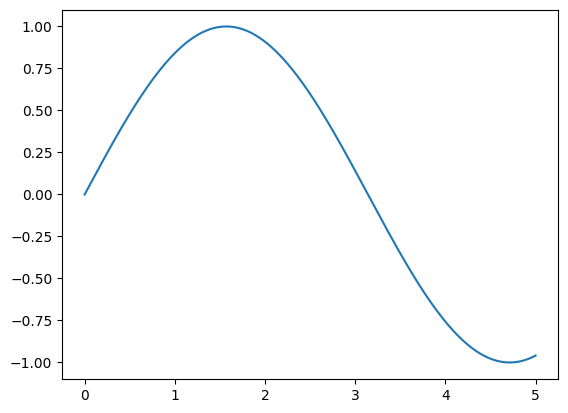

In [17]:
wontshutup()

And you can selectively disable capturing stdout, stderr or rich display, by passing `--no-stdout`, `--no-stderr` and `--no-display`

In [ ]:
%%capture cap --no-stderr
print('hi, stdout')
print("hello, stderr", file=sys.stderr)

hello, stderr


In [ ]:
cap.stdout

In [ ]:
cap.stderr

In [ ]:
cap.outputs